The Breast Cancer data set is a real-valued multivariate data that consists of two classes, where each class signifies whether a patient has breast cancer or not. The two categories are: malignant and benign.

https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [ ]:
!unzip /content/breast+cancer+wisconsin+diagnostic.zip

Archive:  /content/breast+cancer+wisconsin+diagnostic.zip
  inflating: wdbc.data               
  inflating: wdbc.names              


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
breast_cancer_df = pd.read_csv('/content/wdbc.data',
                               names=['ID','Diagnosis','radius1','texture1','perimeter1','area1','smoothness1','compactness1',
                                      'concavity1','concave_points1','symmetry1','fractal_dimension1','radius2','texture2','perimeter2',
                                      'area2','smoothness2','compactness2','concavity2','concave_points2','symmetry2','fractal_dimension2',
                                      'radius3','texture3','perimeter3','area3','smoothness3','compactness3','concavity3','concave_points3',
                                      'symmetry3','fractal_dimension3'])

In [ ]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

In [ ]:
breast_cancer_df = breast_cancer_df.drop('ID', axis=1)

In [ ]:
breast_cancer_df.head()

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# normalizing the features
features = breast_cancer_df.columns[1:]
x = breast_cancer_df.loc[:, features].values
x = StandardScaler().fit_transform(x) # mean 0, std 1
x.shape

(569, 30)

In [ ]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [ ]:
normalised_breast_features_df = pd.DataFrame(x,columns=features)
normalised_breast_features_df.head(3)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391


In [ ]:
# PCA
pca_breast = PCA(n_components=2)
pca_breast_fitted = pca_breast.fit_transform(x)
pca_breast_df = pd.DataFrame(data = pca_breast_fitted, columns = ['principal component 1', 'principal component 2'])
pca_breast_df

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [70]:
# explained_variance_ratio provide you with the variance each principal component holds after projecting the data to a lower dimensional subspace
# principal component 1 holds 44.2% of the information while the principal component 2 holds only 19% of the information.
print(pca_breast.explained_variance_)
print(pca_breast.explained_variance_ratio_)
print(pca_breast.noise_variance_)

[13.30499079  5.7013746 ]
[0.44272026 0.18971182]
0.3945161251181347


In [67]:
pca_breast.singular_values_

array([86.93235745, 56.90677266])

<Figure size 640x480 with 0 Axes>

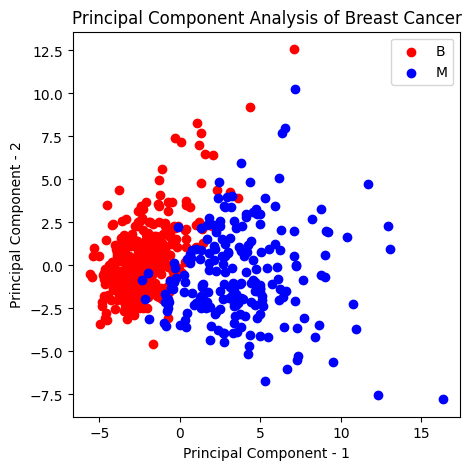

In [ ]:
plt.figure()
plt.figure(figsize=(5,5))
plt.xlabel('Principal Component - 1')
plt.ylabel('Principal Component - 2')
plt.title("Principal Component Analysis of Breast Cancer")

targets = ['B', 'M']
for target, color in zip(targets, ['r', 'b']):
    target_indexes = breast_cancer_df['Diagnosis'] == target
    plt.scatter(pca_breast_df.loc[target_indexes, 'principal component 1'],
                pca_breast_df.loc[target_indexes, 'principal component 2'],
                c=color)

# B=Benign; M=Malign
plt.legend(targets,
           prop={'size': 10})
